In [1]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
'''Create useful functions'''

# create classification metrics function
def get_classification_metrics(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    print('Confusion Matrix: \n', cm)
    tp = cm[0,0]
    tn = cm[1,1]
    fn = cm[0,1]
    fp = cm[1,0]

    accuracy = (tp + tn) / cm.sum()
    print(f'Accuracy: {round(accuracy, 4)}.')
    
    sensitivity = tp / (tp + fn)   
    print(f'Sensitivity: {round(sensitivity, 4)}.')

    specifity = tn / (tn + fp)
    print(f'Specifity: {round(specifity, 4)}.')

    mean_sensitivity_and_specifity = (sensitivity + specifity) / 2
    print(f'Mean of sensitivity and specifity: {round(mean_sensitivity_and_specifity, 4)}.')

    return {'accuracy': accuracy, 'sensitivity': sensitivity, 'specifity': specifity, 'mean_sensitivity_and_specifity': mean_sensitivity_and_specifity}

In [3]:
# create artificial dataset function
def get_artificial_dataset(use_scaling):
    x_array, y_array = make_classification(
        n_classes=2,class_sep=1.2,weights=[0.98, 0.02],
        n_informative=3,n_redundant=1,flip_y=0,n_features=10,
        n_clusters_per_class=3,n_samples=30000,random_state=10
    )

    if use_scaling:
        scaled_x_array = StandardScaler().fit_transform(x_array)
        return scaled_x_array, y_array  
    else:
        return x_array, y_array

In [4]:
'''Create_artificial_dataset'''

x_array, y_array = get_artificial_dataset(use_scaling=True)
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.3, random_state=500)

<Axes: xlabel='pca1', ylabel='pca2'>

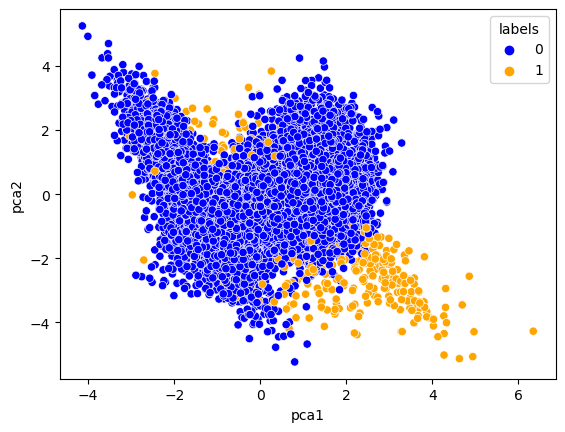

In [6]:
pca = PCA(n_components=2, random_state=123)
x_pca_frame = pd.DataFrame(pca.fit_transform(x_train), columns=['pca1', 'pca2'])
x_pca_frame['labels'] = y_train.tolist()
x_pca_frame['type'] = 'original'

sns.scatterplot(data=x_pca_frame, x='pca1', y='pca2', hue='labels', palette=['blue', 'orange'] )

Cladd count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 20575, 1: 20575}).
Confusion Matrix: 
 [[8693  132]
 [  69  106]]
Accuracy: 0.9777.
Sensitivity: 0.985.
Specifity: 0.6057.
Mean of sensitivity and specifity: 0.7954.


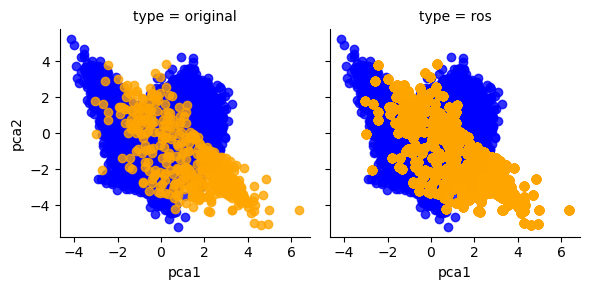

In [9]:
'Data-level treatments'

# oversampling

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# RandomOverSampler
x_train_ros, y_train_ros = RandomOverSampler(random_state=0).fit_resample(x_train, y_train)
print(f'Cladd count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_ros)}.')

x_pca_ros_frame = pd.DataFrame(pca.transform(x_train_ros), columns=['pca1', 'pca2'])
x_pca_ros_frame['labels'] = y_train_ros.tolist()
x_pca_ros_frame['type'] = 'ros'
chart_frame = pd.concat([x_pca_frame, x_pca_ros_frame])

g = sns.FacetGrid(chart_frame, hue='labels', col='type', palette=['blue', 'orange'])
g.map(sns.regplot, 'pca1', 'pca2', fit_reg=False, x_jitter=0)

knn_ros = KNeighborsClassifier().fit(x_train_ros, y_train_ros)
knn_ros_predicted = knn_ros.predict(x_test)
knn_ros_metrics = get_classification_metrics(y_test, knn_ros_predicted)


In [10]:
# SMOTE - synthetic minority oversampling technique
Image(url='https://bit.ly/3rIQS3T', width=1200, height=800)
# image from https://rikunert.com/SMOTE_explained

Class count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 20575, 1: 20575}).
Confusion Matrix: 
 [[8501  324]
 [  52  123]]
Accuracy: 0.9582.
Sensitivity: 0.9633.
Specifity: 0.7029.
Mean of sensitivity and specifity: 0.8331.


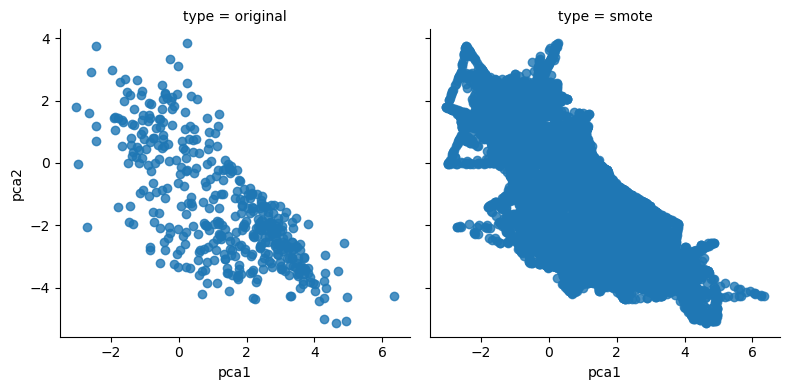

In [13]:
x_train_smote, y_train_smote = SMOTE(random_state=0).fit_resample(x_train, y_train)
print(f'Class count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_smote)}.')

x_pca_smote_frame = pd.DataFrame(pca.transform(x_train_smote), columns=['pca1', 'pca2'])
x_pca_smote_frame['labels'] = y_train_smote.tolist()
x_pca_smote_frame['type'] = 'smote'
chart_frame = pd.concat([x_pca_frame, x_pca_smote_frame])

g = sns.FacetGrid(data=chart_frame[chart_frame['labels']==1], col='type', margin_titles=True, height=4)
g.map(sns.regplot, 'pca1', 'pca2', fit_reg=False, x_jitter=0)

knn_smote = KNeighborsClassifier().fit(x_train_smote, y_train_smote)
knn_smote_predicted = knn_smote.predict(x_test)
knn_smote_metrics = get_classification_metrics(y_test, knn_smote_predicted)

Class count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 20575, 1: 20502}).
Confusion Matrix: 
 [[8462  363]
 [  47  128]]
Accuracy: 0.9544.
Sensitivity: 0.9589.
Specifity: 0.7314.
Mean of sensitivity and specifity: 0.8451.


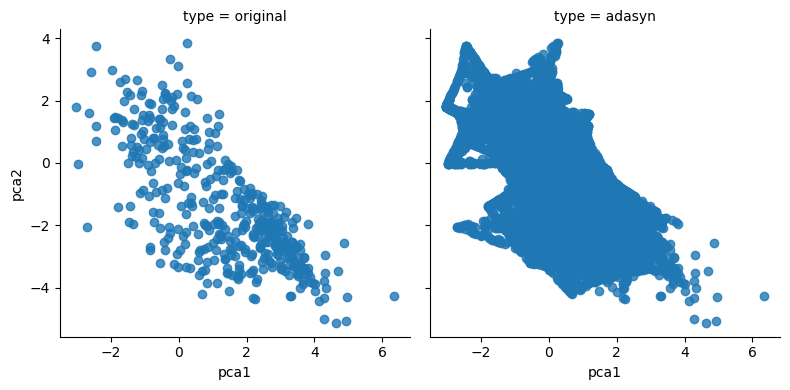

In [14]:
# ADASYN

x_train_adasyn, y_train_adasyn = ADASYN().fit_resample(x_train, y_train)
print(f'Class count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_adasyn)}.')

x_pca_adasyn_frame = pd.DataFrame(pca.transform(x_train_adasyn), columns=['pca1', 'pca2'])
x_pca_adasyn_frame['labels'] = y_train_adasyn.tolist()
x_pca_adasyn_frame['type'] = 'adasyn'
chart_frame = pd.concat([x_pca_frame, x_pca_adasyn_frame])

g = sns.FacetGrid(data=chart_frame[chart_frame['labels']==1], col='type', margin_titles=True, height=4)
g.map(sns.regplot, 'pca1', 'pca2', fit_reg=False, x_jitter=0)

knn_adasyn = KNeighborsClassifier().fit(x_train_adasyn, y_train_adasyn)
knn_adasyn_predicted = knn_adasyn.predict(x_test)
knn_adasyn_metrics = get_classification_metrics(y_test, knn_adasyn_predicted)

Class count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 425, 1: 425}).
Confusion Matrix: 
 [[7752 1073]
 [  20  155]]
Accuracy: 0.8786.
Sensitivity: 0.8784.
Specifity: 0.8857.
Mean of sensitivity and specifity: 0.8821.


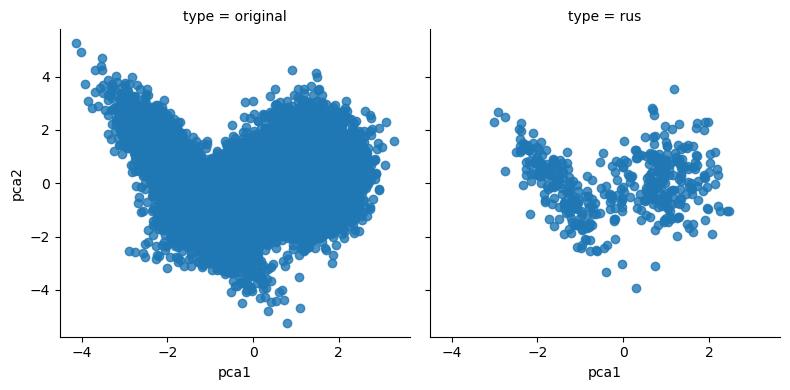

In [16]:
'''Undersampling'''

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids

# RandomUnderSampler
x_train_rus, y_train_rus = RandomUnderSampler(random_state=0).fit_resample(x_train, y_train)
print(f'Class count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_rus)}.')

x_pca_rus_frame = pd.DataFrame(pca.transform(x_train_rus), columns=['pca1', 'pca2'])
x_pca_rus_frame['labels'] = y_train_rus.tolist()
x_pca_rus_frame['type'] = 'rus'
chart_frame = pd.concat([x_pca_frame, x_pca_rus_frame])

g = sns.FacetGrid(data=chart_frame[chart_frame['labels']==0], col='type', margin_titles=True, height=4)
g.map(sns.regplot, 'pca1', 'pca2', fit_reg=False, x_jitter=0)

knn_runs = KNeighborsClassifier().fit(x_train_rus, y_train_rus)
knn_rus_predicted = knn_runs.predict(x_test)
knn_rus_metrics = get_classification_metrics(y_test, knn_rus_predicted)

Class count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 425, 1: 425}).
Confusion Matrix: 
 [[8213  612]
 [  27  148]]
Accuracy: 0.929.
Sensitivity: 0.9307.
Specifity: 0.8457.
Mean of sensitivity and specifity: 0.8882.


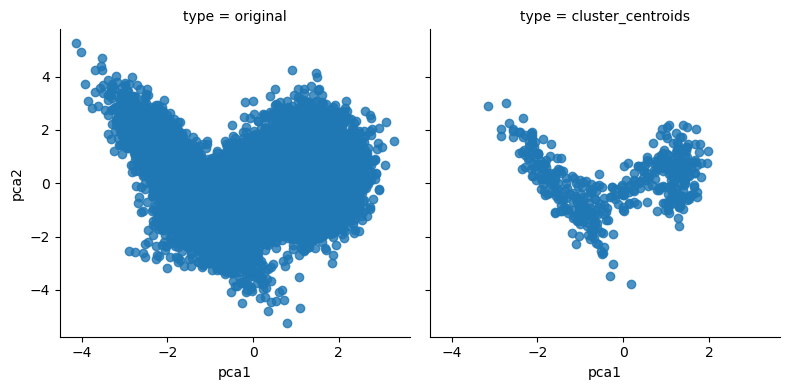

In [17]:
# ClusterCentroids - clustering based undersampling
x_train_cc, y_train_cc = ClusterCentroids(random_state=0).fit_resample(x_train, y_train)
print(f'Class count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_cc)}.')

x_pca_cc_frame = pd.DataFrame(pca.transform(x_train_cc), columns=['pca1', 'pca2'])
x_pca_cc_frame['labels'] = y_train_cc.tolist()
x_pca_cc_frame['type'] = 'cluster_centroids'
chart_frame = pd.concat([x_pca_frame, x_pca_cc_frame])

g = sns.FacetGrid(data=chart_frame[chart_frame['labels']==0], col='type', margin_titles=True, height=4)
g.map(sns.regplot, 'pca1', 'pca2', fit_reg=False, x_jitter=0)

knn_cc = KNeighborsClassifier().fit(x_train_cc, y_train_cc)
knn_cc_predicted = knn_cc.predict(x_test)
knn_cc_metrics = get_classification_metrics(y_test, knn_cc_predicted)

In [23]:
# TomekLinks
Image(url='https://bit.ly/3uczum9h', width=900, height=300)

In [25]:
x_train_tl, y_train_tl = TomekLinks().fit_resample(x_train, y_train)
print(f'Class count before oversampling: {Counter(y_train)}.')
print(f'Class count after oversampling: {Counter(y_train_tl)}.')
knn_tl = KNeighborsClassifier().fit(x_train_tl, y_train_tl)
knn_tl_predicted = knn_tl.predict(x_test)
knn_tl_metrics = get_classification_metrics(y_test, knn_tl_predicted)


Class count before oversampling: Counter({0: 20575, 1: 425}).
Class count after oversampling: Counter({0: 20531, 1: 425}).
Confusion Matrix: 
 [[8820    5]
 [ 103   72]]
Accuracy: 0.988.
Sensitivity: 0.9994.
Specifity: 0.4114.
Mean of sensitivity and specifity: 0.7054.


In [26]:
'''Hybrid approach - combining under&over sampling'''

#ClusterCentroids + SMOTE
x_train_cc, y_train_cc = ClusterCentroids(random_state=0, sampling_strategy={0: 500}).fit_resample(x_train, y_train)
x_train_cc_smote, y_train_cc_smoke = SMOTE().fit_resample(x_train_cc, y_train_cc)
Counter(y_train_cc_smoke)
knn_cc = KNeighborsClassifier().fit(x_train_cc_smote, y_train_cc_smoke)
knn_cc_predicted = knn_cc.predict(x_test)
get_classification_metrics(y_test, knn_cc_predicted)

Confusion Matrix: 
 [[8136  689]
 [  27  148]]
Accuracy: 0.9204.
Sensitivity: 0.9219.
Specifity: 0.8457.
Mean of sensitivity and specifity: 0.8838.


{'accuracy': 0.9204444444444444,
 'sensitivity': 0.9219263456090652,
 'specifity': 0.8457142857142858,
 'mean_sensitivity_and_specifity': 0.8838203156616755}